
# Homework 2

## Roxy Zhang - rz2570

### Due: Fri Nov 4th @ 11:59pm ET

In this homework we will be performing model evaluation, model selection and hyperparameter tuning in both a regression and classification setting.

We will be working with a small set of home sales data as we might see on a real-estate website.


## Instructions

- Replace Name and UNI in the first cell and filename
- Follow the comments below and fill in the blanks (\_\_\_\_) to complete.
- Please **'Restart and Run All'** prior to submission.
- **Save pdf in Landscape** and **check that all of your code is shown** in the submission.
- When submitting in Gradescope, be sure to **select which page corresponds to which question.**

Out of 50 points total.

## Part 0: Environment Setup

In [1]:
# 1. (2pts total) Homework Submission

# (1pt) The homework should be spread over multiple pdf pages, not one single pdf page
# (1pt) When submitting, assign each question to the pdf page where the solution is printed.
#        If there is no print statement for a question, assign the question to the first pdf 
#        page where the code for the question is visible.

In [2]:
# 2. (2pts) Set up our environment with common libraries and plot settings.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy as np, pandas as pd, matplotlib.pyplot as plt and seaborn as sns
# Note: use as many lines of code as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style to 'darkgrid'
sns.set_style('darkgrid')

# Execute the matplotlib magic function to ensure plots are displayed inline
%matplotlib inline

## Part 1: Regression

In Part 1 we will try to predict a real value home sale price using several models.

,SqFtLiving1e3,SqFtLot1e3,NumBedrooms
count,500.00,500.00,500.00
mean,1.90,5.79,3.26
std,0.75,2.38,0.87
min,0.66,0.97,1.00
25%,1.33,4.00,3.00
50%,1.79,5.70,3.00
75%,2.36,7.75,4.00
max,4.20,9.99,7.00


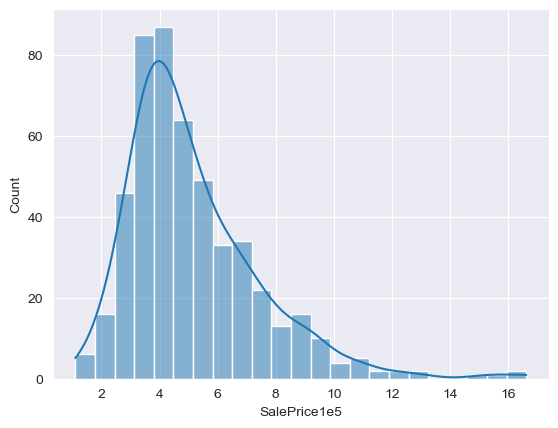

In [3]:
# 3. (4pts) Load and prepare our data.

# Read in the csv file ../data/home_sales.csv 
#   Use pandas .read_csv() with default parameter settings
#   Contains the columns
#     SqFtLiving1e3 : square feet of living space in 1000s of sqft.
#     SqFtLot1e3    : square feet of the lot in 1000s of sqft.
#     NumBedrooms   : number of bedrooms
#     SalePrice1e5  : sale price in $10_000s
# Store in df
df = pd.read_csv('../data/home_sales.csv')

# Create a dataframe X which contains these 3 columns from df:
#  'SqFtLiving1e3','SqFtLot1e3','NumBedrooms'
X = df[['SqFtLiving1e3','SqFtLot1e3','NumBedrooms']]

# Create a series y_r which contains only the column SalePrice1e5
#    Note: the '_r' is for our regression target
y_r = df.SalePrice1e5

# Check that X and y_r are the correct shape (500 rows)
assert X.shape == (500,3)
assert y_r.shape == (500,)

# To confirm that all features of X are similar in scale display the .describe() of X
#   Use .round(2) to round all values to a precision of 2
display(X.describe().round(2))

# To get a sense of the distribution of the target, plot a histogram of y_r using sns.histplot()
sns.histplot(data = y_r, kde = True);

In [4]:
# 4. (3pts) Create a training and test/held-aside set for regression

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split X and y_r using train_test_split
#   Use 80% train and 20% test
#   Use random_state=512 for grading consistency.
#   Store in X_train_r, X_test_r, y_train_r, y_test_r
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,
                                                            y_r,
                                                            train_size = .80,
                                                            test_size = .20,
                                                            random_state = 512)

# Print out the the length of y_test_r divided by the length y_r to confirm our test set size.
print(f'proportion of data in test set: {y_test_r.shape[0] / y_r.shape[0]}')

proportion of data in test set: 0.2


### Part 1.1 Baseline Regressor

In [5]:
# 5. (2pts) Create a DummyRegressor and fit on the training set.

# Import the DummyRegressor model from sklearn 
from sklearn.dummy import DummyRegressor

# Instantiate a DummyRegessor model with strategy="mean" (the default)
# Store in dummy_r
dummy_r = DummyRegressor(strategy = 'mean')

# Train the DummyRegressor on the regression training set
dummy_r.fit(X_train_r, y_train_r)

# Calculate the training set R^2 score of the DummyRegressor
dummy_r_training_r2 = dummy_r.score(X_train_r, y_train_r)

# Recall that this should equal 0
print(f'dummy training set R^2: {dummy_r_training_r2.round(2)}')

dummy training set R^2: 0.0


### Part 1.2 Linear Regression and Cross-Validation

In [6]:
# 6. (2pts) Train a Linear Regression model and calculate training set R^2.

# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model 
#    with default arguments 
#    and fit on the training set
# Store in lr
lr = LinearRegression().fit(X_train_r, y_train_r)

# Calculate the training set R^2 of the LinearRegression model
lr_training_r2 = lr.score(X_train_r, y_train_r)

# This should be better than our dummy R^2
print(f'lr training set R^2: {lr_training_r2.round(2)}')

lr training set R^2: 0.49


In [7]:
# 7. (2pts) Use 5-fold Cross Validation to get a sense of the variation 
#    of Liner Regression R^2 performance on the training set.

# Import cross_val_score from sklearn.
from sklearn.model_selection import cross_val_score

# Generate 5-fold cross-validation R^2 scores 
#    for a LinearRegression model with default arguments
#    on the training set
#    Use 5-folds (the default)
# Store in lr_cv_scores
lr_cv_scores = cross_val_score(lr,
                               X_train_r,
                               y_train_r,
                               cv = 5)

# Print out the R^2 scores found by cross_val_score rounded to a precision of 2
#   we should 5 floats between .3 and .6
lr_cv_scores.round(2) 

array([0.5 , 0.51, 0.48, 0.34, 0.44])

In [8]:
# 8. (1pts) Calculate mean training cv R^2 score +- 2 std. deviations

# Calculate the mean training cross validation score using the scores created above
lr_cv_mean = lr_cv_scores.mean()

# Calculate 2 standard deviations of the cross validation scores
lr_cv_2std = lr_cv_scores.std()*2

# Print out the mean R^2 +- 2 standard variations for the LinearRegression model
#   each rounded to a precision of 2
print(f'lr mean cv r2: {lr_cv_mean.round(2)} +- {lr_cv_2std.round(2)}')

lr mean cv r2: 0.45 +- 0.12


### Part 1.3 Overfitting with a Decision Tree

In [9]:
# 9. (2pts) Create a DecisionTreeRegressor and fit on the training set.

# Import the DecisionTreeRegressor model from sklearn 
from sklearn.tree import DecisionTreeRegressor

# Instantiate a DecisionTreeRegressor model 
#    with max_depth=10
#    and fit on the training set
# Store in dtr
dtr = DecisionTreeRegressor(max_depth = 10).fit(X_train_r, y_train_r)

# Calculate the training set R^2 score of the DecisionTreeRegressor
dtr_training_r2 = dtr.score(X_train_r, y_train_r)

# This should be a high R^2 value
print(f'dummy training set R^2: {dtr_training_r2.round(2)}')

dummy training set R^2: 0.95


### Part 1.3 Evaluate on Test Set

In [10]:
# 10. (2pts) Evaluate performance of our trained models on the test set.

# Calculate R^2 on the test set using the previously trained models
#   We do not need to fit the models again on the training set data
dummy_r_test_r2 = dummy_r.score(X_test_r, y_test_r)

lr_test_r2 = lr.score(X_test_r, y_test_r)

dtr_test_r2 = dtr.score(X_test_r, y_test_r)

print(f'dummy test R2 : {dummy_r_test_r2.round(2): .2f}') # this may be less than 0
print(f'   lr test R2 : {lr_test_r2.round(2): .2f}')      # this should within the lr training cv += 2 std devs
print(f'  dtr test R2 : {dtr_test_r2.round(2): .2f}')     # this should show overfitting

dummy test R2 : -0.01
   lr test R2 :  0.39
  dtr test R2 : -0.10


---

## Part 2: Classification

Here we build several models to classify low vs. high sale price, create a validation curve and perform grid search.

### Create Classification Target

In [11]:
# To reuse the same dataset, we'll first create a binary target for 
#    classification by thresholding at the mean of our SalePrice1e5

# The classes are:
#    Low  SalePrice1e5 = 0
#    High SalePrice1e5 = 1

y_c = (df.SalePrice1e5 > df.SalePrice1e5.mean()).astype(int)

# Print out the class labels with counts and note it's an imbalanced binary classification problem
pd.Series(y_c).value_counts()

0    305
1    195
Name: SalePrice1e5, dtype: int64

### Part 2.1 Create Classification Train/Test Split

In [12]:
# 11. (4pts) Create a training and test/held-aside set for classifiction

# Split X (the same X as before) and the new y_c using train_test_split
#   Use 80% train and 20% test
#   Stratify according to y_c so class proportions are the same in train and test
#   Use random_state=512 for grading consistency.
#   Store in X_train_c, X_test_c, y_train_c, y_test_c
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X,
                                                            y_c,
                                                            stratify = y_c,
                                                            random_state = 512)

# Print out the proportion of Low values (label of 0) in y_c rounded to a precision of 2
print(f'proportion of Low values: {pd.Series(y_c).value_counts()[0]/pd.Series(y_c).value_counts().sum().round(2)}') 
# should be near 60%

# Assert that train and test have similar class proportions.
# Find the proportion of Low (0) values in both y_train_c and y_test_c and 
#    assert that the absolute difference of these proportions is less than .01
assert abs(np.float64(pd.Series(y_c).value_counts()[0]/pd.Series(y_c).value_counts().sum()).round(2) - \
np.float64(pd.Series(y_test_c).value_counts()[0]/pd.Series(y_test_c).value_counts().sum()).round(2)) < 0.01
# use np.float64(x) to unify the number of rounded digits

proportion of Low values: 0.61


### Part 2.2 Measure Classification Baseline Performance

In [13]:
# 12. (2pts)  Create a Dummy Classifier and confirm the expected performance on the training set.

# Import DummyClassifier from sklearn
from sklearn.dummy import DummyClassifier

# Instantiate a DummyClassifier with strategy="prior" (default) 
#    and fit on the the classification training set
# Store in dummy_c
dummy_c = DummyClassifier(strategy = 'prior').fit(X_train_c, y_train_c)

# Print the trained DummyClassifier accuracy on the training set rounded to a precision of 2
#   It should match the proportion of Low values we saw above.
print(f'dummy training set accuracy: {dummy_c.score(X_train_c, y_train_c).round(2)}')

dummy training set accuracy: 0.61


### Part 2.3  Logistic Regression model

In [14]:
# 13. (2pts) It's good practice to start with a "simple" model.
#     Train and calculate 5-fold cv training set accuracy for a Logistic Regression Classifier.

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Generate 5-fold cross validation accuracy on the training set
#    using LogisticRegression with default hyperparameters
# Store as logr_cv_scores
logr_cv_scores = cross_val_score(LogisticRegression().fit(X_train_c, y_train_c), X_train_c, y_train_c, cv = 5)

# Print out the mean cv accuracy for the LogisticRegression model rounded to a precision of 2
print(f'logr mean cv accuracy: {np.mean(logr_cv_scores).round(2)}')

logr mean cv accuracy: 0.77


### Part 2.4 GradientBoosting model

In [15]:
# 14. (2pts) Now let's try a more complex model.
#     Train and calculate 5-fold cv accuracy 
#     for a GradientBoosting model using the training set.

# Import the GradientBoostingClassifier model from sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Calculate 5-fold cv training set accuracy scores 
#   for a GradientBoostingClassifier
#       with 50 trees (n_estimators=50)
#       with max_depth=10
# This time call cross_val_score with n_jobs=-1 (use one core for each fold) to speed up the cv calculations
# Store in gbc_cv_scores
gbc_cv_scores = cross_val_score(GradientBoostingClassifier(n_estimators = 50, max_depth = 10),
                                X_train_c,
                                y_train_c,
                                n_jobs = -1,
                                cv = 5)
 
# Print out the mean cv accuracy for the GradientBoostingClassifier model rounded to a precision of 2
#   Should be lower than logr above (overfitting in each fold?)
print(f'gbc mean cv accuracy: {np.mean(gbc_cv_scores).round(2)}') 

gbc mean cv accuracy: 0.71


### Part 2.5 GradientBoosting and Validation Curve

In [16]:
# 15. (4pts) Let's investigate how the depth of trees (max_depth) affects performance.
#     Generate a validation curve for tree depths in the GradientBoosting model.

# Import the validation_curve function from sklearn
from sklearn.model_selection import validation_curve 

# In the GradientBoostingClassifier model, the depth of trees is set via max_depth
# Create a list depths that contains the values 1,2,3,5,10
depths = [1,2,3,5,10]

# Generate the train_scores and test_scores for max_depth at different maximum depths
#   Use the validation_curve function
#   Use a GradientBoostingClassifier with n_estimators=50 trees
#   Use our training set X_train_c, y_train_c
#   Use the 'max_depth' parameter as the param_name to vary
#   Use the depths list created above as the parameter range
#   Use 3-fold cross validation (reducing to 3 to speed things up)
#   Use n_jobs=-1 to speed things up
#   Use the default accuracy scoring as the scoring metric
# Store the results in train_scores,test_scores
train_scores,test_scores = validation_curve(GradientBoostingClassifier(n_estimators = 50),
                                            X_train_c, y_train_c,
                                            param_name = 'max_depth',
                                            param_range = depths,
                                            cv = 3,
                                            n_jobs = -1)

# print the training set scores generated by validation_curve, rounded to a precision of 2
#   we should see 5 rows by 3 columns of numbers between 0 and 1
train_scores.round(2) 

array([[0.83, 0.84, 0.8 ],
       [0.88, 0.87, 0.88],
       [0.91, 0.93, 0.93],
       [0.99, 1.  , 1.  ],
       [1.  , 1.  , 1.  ]])

,mean_train_scores,mean_test_scores
1,0.83,0.78
2,0.88,0.79
3,0.92,0.79
5,1.00,0.77
10,1.00,0.73


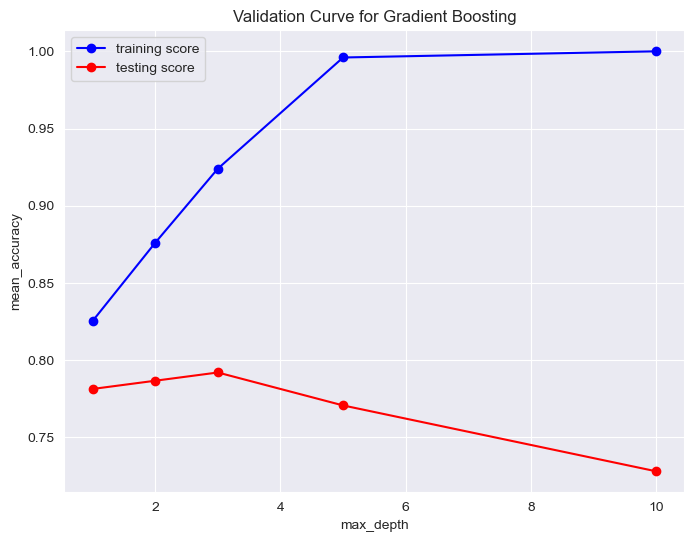

In [17]:
# 16. (5pts) Plot the validation curves generated above

# train_scores and test_scores each contain a 2-D array of values
#   For each depth (rows) there are 3 scores (columns), one for each fold
#   Take the mean for each depth across folds (columns or axis=1) 
#      and store in mean_train_scores and mean_test_scores
mean_train_scores = np.mean(train_scores, axis = 1)
mean_test_scores = np.mean(test_scores, axis = 1)

assert mean_train_scores.shape == (5,) # There should now be 5 floats, one per row, and no columns
assert mean_test_scores.shape == (5,)

# Create a pandas DataFrame by passing in 
#   a dictionary of string:list pairs with
#     keys: 'mean_train_scores','mean_test_scores'
#        mapping to (respectively)
#     values: mean_train_scores, mean_test_scores
#   and with the DataFrame index=depths
# Store in df_val_scores
df_val_scores = pd.DataFrame({'mean_train_scores': mean_train_scores,
                             'mean_test_scores': mean_test_scores},
                             index = depths)

# Display df_val_scores with values rounded to a precision of 2
#   We should see a dataframe with 5 rows and 2 columns
#   The row labels should be our depths
#   The columns should be mean_train_scores and mean_test_scores
#   The 10 score values should be between 0 and 1
display(df_val_scores.round(2))

# Plot the values in df_val_scores as 2 lines on the same plot
#   Use Pandas .plot() with kind='line' (the default)
#   Catch the returned matplotlib axis in ax
#   Using ax, label the x-axis as "max_depth" 
#     and the y-axis as "mean accuracy"
#   Note that as depth increases, both train and test accuracy increase (slightly) and then begin to diverge
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(depths, mean_train_scores, 'o-', color = 'b', label  = 'training score');
ax.plot(depths, mean_test_scores, 'o-', color = 'r', label  = 'testing score');
ax.set_xlabel('max_depth'), ax.set_ylabel('mean_accuracy');
ax.set_title('Validation Curve for Gradient Boosting');
ax.legend();

### Part 2.6 GradientBoosting and Grid Search

In [18]:
# 17. (5pts) Above we are looking at tuning a single hyperparameter (max_depth).
#     Now let's tune two hyperparameters at the same time.
#     Perform 3-fold cross validated grid search over "number of trees" and "tree depth".

# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Create the grid of parameters to test as a dictionary
#   The parameter settings to try are 
#   'n_estimators':[10,50,100,200],'max_depth':[1,2,3,5,10]
param_grid = {'n_estimators':[10,50,100,200],
              'max_depth':[1,2,3,5,10]}

# Instantiate and fit GridSearchCV on the classification training set
#   Use GradientBoostingClassifier with default arguments
#   Use the param_grid parameter grid defined above
#   Use 3-folds
#   Use default scoring (accuracy)
#   Use refit=True (default) so the model is retrained on the entire training set
#   Set n_jobs=-1 to use all cores
# Store the fitted (on the training set) GridSearchCV in gbc_gscv
gbc_gscv = GridSearchCV(GradientBoostingClassifier(),
                        param_grid = param_grid,
                        cv = 3,
                        refit = True,
                        n_jobs = -1) \
           .fit(X_train_c, y_train_c)

# Print out the best the best hyperparameter setting found (best_params_) 
#    and the mean accuracy they produced (best_score_)
print(f'gbc best hyperparams      : {gbc_gscv.best_params_}')
print(f'gbc best mean cv accuracy : {gbc_gscv.best_score_}')

# Note that you may get different answers on different runs due to 
#   the random cv splits used at each grid point

gbc best hyperparams      : {'max_depth': 1, 'n_estimators': 200}
gbc best mean cv accuracy : 0.8000000000000002


### Part 2.7 Evaluate on Test

In [19]:
# 18. (4pts) Evaluate the best model on the test set

# Which of our models has the highest training set cv accuracy?
#   gbc_gscv : the GradientBoostingClassifier model with hyperparameters chosen by GridSearch
#   logr     : the LogisticRegression model
# If performance is the same on both models put "no difference"
print('best model found: gbc_gscv')

# To see how each of our models would generalize to new data,
#     calculate the **test set** accuracy for each of our trained models

# First, instantiate and train a new LogisticRegression model with default settings on the training set.
#   Note that, while we did train a LogisticRegression model several times when 
#   calculating the cross-validation accuracy, we never trained it on the full training set
# Store in logr
logr = LogisticRegression().fit(X_train_c, y_train_c)

# Find the test set accuracy of both of our trained models
# Note that, since we used refit=True when doing grid search on the GradientBoostingClassifier,
#   we can use gbc_gscv.score() without retraining
logr_test_acc = logr.score(X_test_c, y_test_c)
gbc_test_acc = gbc_gscv.score(X_test_c, y_test_c)

print(f'logr test acc     : {logr_test_acc.round(2)}')
print(f'gbc_gscv test acc : {gbc_test_acc.round(2)}')

# TO THINK ABOUT, BUT DON'T NEED TO ANSWER:
# Did the model we chose have the best test set performance?
# Is it guaranteed that the model with the best performance on the training set will have the best test set score?

best model found: gbc_gscv
logr test acc     : 0.76
gbc_gscv test acc : 0.74
